In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [3]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")

In [4]:
df_train = df.drop(["participant", "category", "set"], axis=1)

In [5]:
X = df_train.drop("label", axis=1)

In [6]:
y = df_train["label"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)    

In [8]:
X

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,-0.306308,-0.170012,-0.020847,0.921435,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,0
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,-0.286807,-0.077810,0.041118,0.880266,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,0
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,-0.324602,-0.068072,0.035701,0.984839,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,0
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,-0.324352,-0.066294,0.036481,0.986036,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,0
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,-0.295388,-0.080264,0.051910,0.903198,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,0.340833,-0.024316,-0.079494,0.930193,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,4
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,0.429542,-0.180736,-0.050210,1.220082,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,1
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,0.346775,-0.147540,-0.051285,0.977783,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,1


In [9]:
y

epoch (ms)
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:08.400    bench
2019-01-11 15:08:08.800    bench
2019-01-11 15:08:09.200    bench
2019-01-11 15:08:09.600    bench
                           ...  
2019-01-20 17:33:26.200      row
2019-01-20 17:33:26.600      row
2019-01-20 17:33:27.000      row
2019-01-20 17:33:27.400      row
2019-01-20 17:33:27.800      row
Name: label, Length: 3868, dtype: object

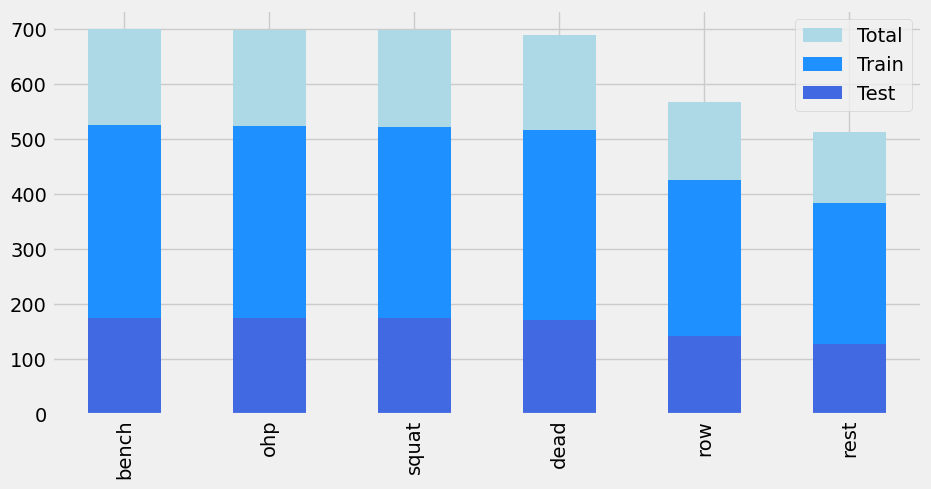

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)

y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()    

In [12]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]

In [13]:
square_features = ["acc_r", "gyr_r"]

In [14]:
pca_features = ["pca_1", "pca_2", "pca_3"]

In [15]:
time_features = [f for f in df_train.columns if "_temp_" in f]

In [19]:
frequency_features = [f for f in df_train.columns if ("_freq" in f) or ("pse" in f)]

In [20]:
cluster_features = ["cluster"]

In [21]:
print("Basic features: ", len(basic_features))
print("Square features: ", len(square_features))
print("PCA features: ", len(pca_features))
print("Time features: ", len(time_features))
print("Frequency features: ", len(frequency_features))
print("Cluster features: ", len(cluster_features))

Basic features:  6
Square features:  2
PCA features:  3
Time features:  16
Frequency features:  88
Cluster features:  1


In [22]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features +  pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + frequency_features + cluster_features))

In [23]:
learner = ClassificationAlgorithms()

In [24]:
max_features = 10

In [25]:
selected_features, ordered_features, ordered_scores = learner.forward_selection(
    max_features, X_train, y_train
)

0
1
2
3
4
5
6
7
8
9


In [26]:
selected_features

['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_r',
 'gyr_y_freq_1.786_Hz_ws_14',
 'acc_y',
 'pca_3']

In [27]:
ordered_features

['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_r',
 'gyr_y_freq_1.786_Hz_ws_14',
 'acc_y',
 'pca_3']

In [28]:
ordered_scores

[0.885556704584626,
 0.9889693209238194,
 0.9955187866253016,
 0.9975870389520854,
 0.9989658738366081,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693]

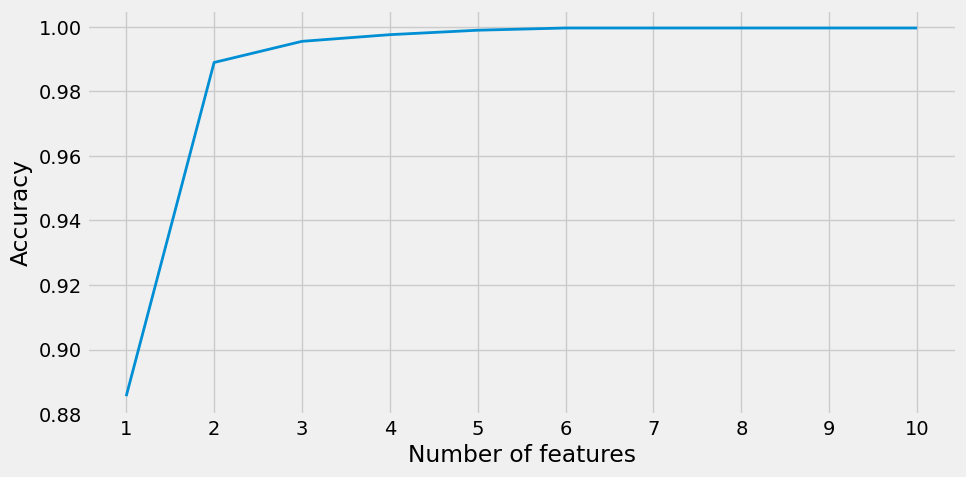

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [30]:
selected_features = [
    'acc_z_freq_0.0_Hz_ws_14',
    'acc_x_freq_0.0_Hz_ws_14',
    'gyr_r_freq_0.0_Hz_ws_14',
    'acc_y_temp_mean_ws_5',
    'acc_r_temp_std_ws_5',
    'gyr_x_temp_mean_ws_5',
    'gyr_r',
    'gyr_y_freq_1.786_Hz_ws_14',
    'acc_y',
    'pca_3'
]

In [31]:
feature_set_1

['acc_x', 'acc_y', 'gyr_x', 'acc_z', 'gyr_z', 'gyr_y']

In [32]:
feature_set_2

['acc_x',
 'pca_2',
 'acc_y',
 'gyr_r',
 'pca_3',
 'gyr_x',
 'acc_z',
 'gyr_z',
 'acc_r',
 'pca_1',
 'gyr_y']

In [33]:
feature_set_3

['acc_y',
 'gyr_z_temp_mean_ws_5',
 'gyr_r',
 'pca_3',
 'gyr_y_temp_std_ws_5',
 'gyr_r_temp_mean_ws_5',
 'gyr_y_temp_mean_ws_5',
 'acc_y_temp_mean_ws_5',
 'acc_y_temp_std_ws_5',
 'acc_x_temp_std_ws_5',
 'acc_z',
 'pca_1',
 'acc_r_temp_std_ws_5',
 'gyr_y',
 'acc_x_temp_mean_ws_5',
 'acc_r_temp_mean_ws_5',
 'acc_z_temp_std_ws_5',
 'gyr_x',
 'gyr_z',
 'acc_r',
 'acc_x',
 'pca_2',
 'gyr_x_temp_mean_ws_5',
 'gyr_z_temp_std_ws_5',
 'gyr_x_temp_std_ws_5',
 'gyr_r_temp_std_ws_5',
 'acc_z_temp_mean_ws_5']

In [34]:
feature_set_4

['acc_y',
 'acc_y_freq_2.143_Hz_ws_14',
 'gyr_z_temp_mean_ws_5',
 'acc_x_freq_0.714_Hz_ws_14',
 'gyr_r',
 'gyr_y_temp_std_ws_5',
 'acc_r_max_freq',
 'acc_r_freq_2.143_Hz_ws_14',
 'acc_r_freq_0.714_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'gyr_y_freq_2.5_Hz_ws_14',
 'gyr_y_pse',
 'gyr_r_max_freq',
 'gyr_y_freq_0.0_Hz_ws_14',
 'gyr_y',
 'gyr_r_pse',
 'acc_x_freq_1.071_Hz_ws_14',
 'gyr_y_freq_2.143_Hz_ws_14',
 'gyr_z_freq_1.429_Hz_ws_14',
 'acc_r_freq_1.786_Hz_ws_14',
 'gyr_z_freq_0.714_Hz_ws_14',
 'gyr_x_temp_mean_ws_5',
 'acc_r_freq_0.357_Hz_ws_14',
 'acc_x_freq_1.786_Hz_ws_14',
 'acc_x_freq_1.429_Hz_ws_14',
 'gyr_x_temp_std_ws_5',
 'gyr_r_freq_1.071_Hz_ws_14',
 'acc_z_freq_1.786_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'acc_y_freq_1.786_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_z_freq_0.0_Hz_ws_14',
 'gyr_y_freq_0.357_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_freq_1.429_Hz_ws_14',
 'gyr_z_max_freq',
 'acc_z_freq_0.357_Hz_ws_14',
 'acc_r_freq_weighted',

In [35]:
selected_features

['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_r',
 'gyr_y_freq_1.786_Hz_ws_14',
 'acc_y',
 'pca_3']

In [36]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]

In [37]:
feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features",
]

In [39]:
score_df = pd.DataFrame()

In [40]:
iterations = 1

In [41]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]
    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0
    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)
        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)
    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations
    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)
    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)
    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)
    performance_test_nb = accuracy_score(y_test, class_test_y)
    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [42]:
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
1,RF,Feature Set 4,0.993795
0,NN,Feature Set 4,0.992761
1,RF,Selected Features,0.991727
3,DT,Feature Set 4,0.990693
3,DT,Selected Features,0.989659
0,NN,Feature Set 3,0.988625
1,RF,Feature Set 3,0.984488
0,NN,Selected Features,0.973113
2,KNN,Feature Set 4,0.972079
4,NB,Feature Set 4,0.963806


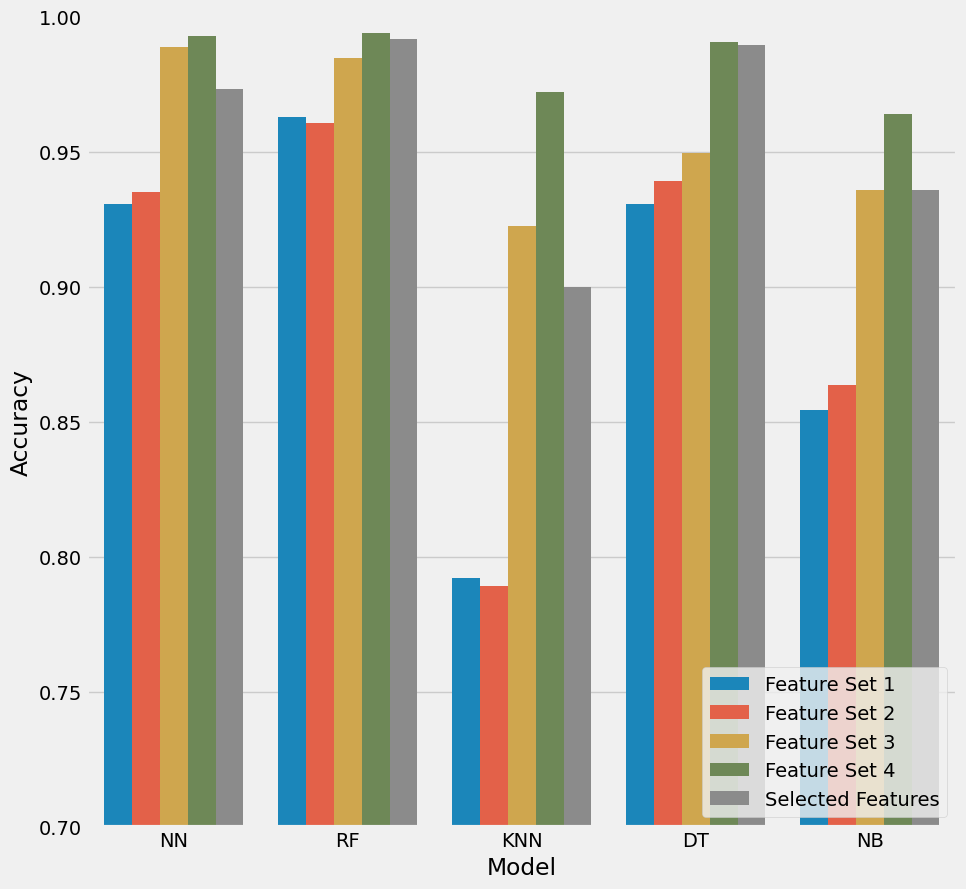

In [44]:
plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

In [45]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

In [46]:
accuracy = accuracy_score(y_test, class_test_y)

In [47]:
accuracy

0.9948293691830403

In [48]:
classes = class_test_prob_y.columns

In [49]:
cm = confusion_matrix(y_test, class_test_y, labels=classes)

In [50]:
cm

array([[173,   0,   2,   0,   0,   0],
       [  0, 171,   0,   0,   1,   0],
       [  0,   0, 175,   0,   0,   0],
       [  0,   0,   0, 128,   0,   0],
       [  0,   2,   0,   0, 140,   0],
       [  0,   0,   0,   0,   0, 175]], dtype=int64)

In [51]:
classes

Index(['bench', 'dead', 'ohp', 'rest', 'row', 'squat'], dtype='object')

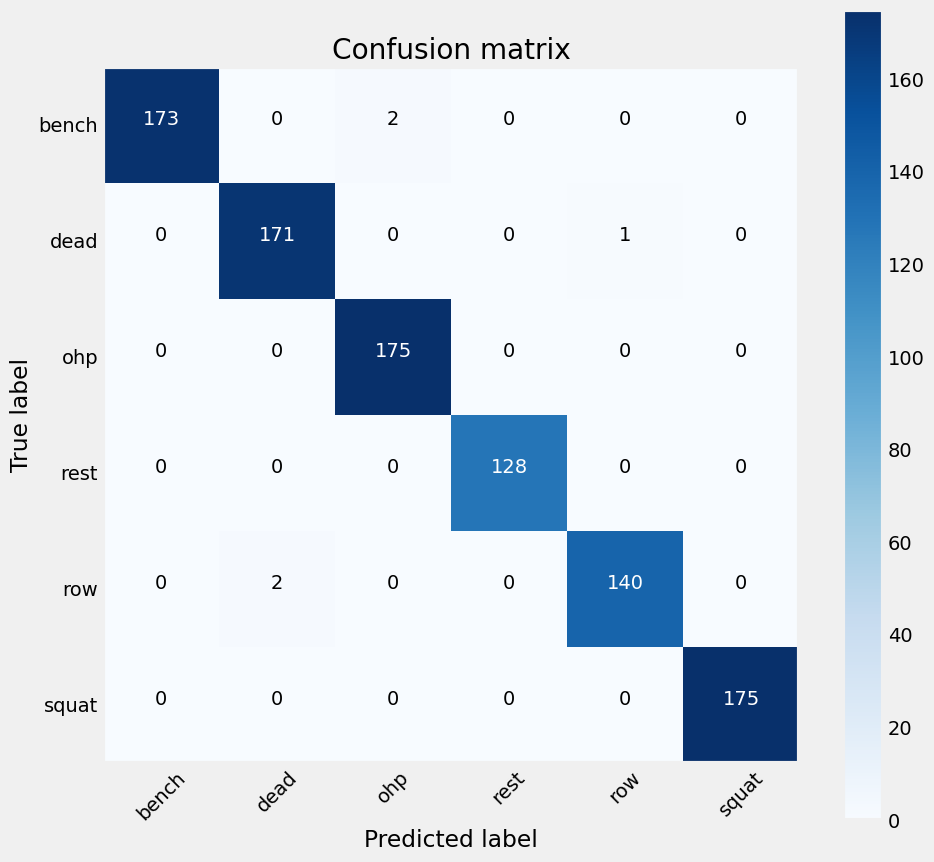

In [52]:
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [54]:
participant_df = df.drop(["set", "category"], axis=1)

In [55]:
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis=1)

In [56]:
y_train = participant_df[participant_df["participant"] != "A"]["label"]

In [57]:
X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis=1)

In [58]:
y_test = participant_df[participant_df["participant"] == "A"]["label"]

In [59]:
X_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,-0.306308,-0.170012,-0.020847,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,0
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,-0.286807,-0.077810,0.041118,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,0
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,-0.324602,-0.068072,0.035701,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,0
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,-0.324352,-0.066294,0.036481,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,0
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,-0.295388,-0.080264,0.051910,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,0.340833,-0.024316,-0.079494,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,4
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,0.429542,-0.180736,-0.050210,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,1
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,0.346775,-0.147540,-0.051285,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,1


In [60]:
X_test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:10:11.400,-0.013910,0.896451,-0.154956,14.160500,-3.186932,-15.474665,A,-0.293872,-0.132897,0.090269,...,0.197581,215.823035,5.668112,-13.015059,12.658350,-15.261431,-27.950194,-14.408091,-5.663977,0
2019-01-11 15:10:11.800,-0.102589,0.861710,-0.211512,6.219879,-12.318853,0.340456,A,-0.291228,-0.182666,0.051236,...,0.155740,225.841089,11.211924,17.460769,-24.589421,9.056748,1.259767,13.263229,6.029432,0
2019-01-11 15:10:12.200,-0.114561,1.194839,-0.165971,-6.228986,-3.458416,-1.834388,A,-0.405589,-0.146274,0.041086,...,0.149058,214.005142,-10.760879,-6.399827,16.040912,-10.679810,18.697746,13.086672,5.692782,0
2019-01-11 15:10:12.600,-0.178058,0.976984,-0.200991,9.032401,6.810420,-13.530446,A,-0.336748,-0.185153,0.025654,...,0.143122,217.959950,-10.494102,-3.138608,7.842907,15.780474,-21.974554,-12.481598,-6.063988,0
2019-01-11 15:10:13.000,-0.170123,0.926899,-0.211001,-15.914028,0.605465,19.830825,A,-0.319912,-0.191122,0.000345,...,0.231660,220.406927,-2.758807,12.149322,-20.069854,-12.083577,6.205158,-25.083899,-26.177866,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-19 17:26:17.800,0.188527,-0.870253,0.454200,18.870754,5.085288,-8.456035,A,0.344208,0.198702,-0.038900,...,0.163063,415.683097,-29.525899,38.996991,-5.174374,-35.708706,-33.342513,0.518818,4.108429,4
2019-01-19 17:26:18.200,0.164850,-0.835022,0.519645,-15.816232,24.202108,-1.831934,A,0.330861,0.235130,-0.096081,...,0.341983,398.995409,-66.464878,76.730129,6.095463,43.658304,0.363577,16.121487,2.541539,4
2019-01-19 17:26:18.600,0.196584,-0.880045,0.509106,-2.928419,26.197246,-24.991792,A,0.349138,0.232734,-0.066181,...,0.165219,417.242222,-26.515407,-28.069037,12.987717,-43.496963,27.408677,-5.870133,-20.315753,4


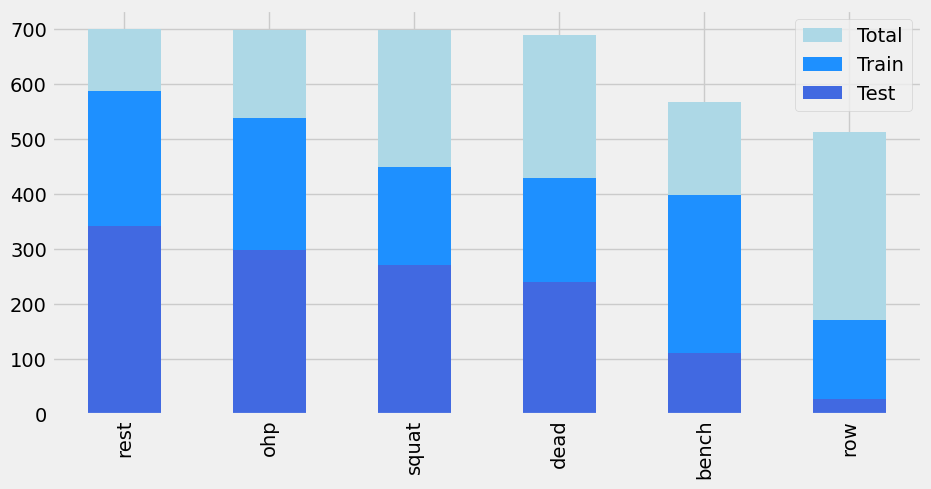

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)

y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

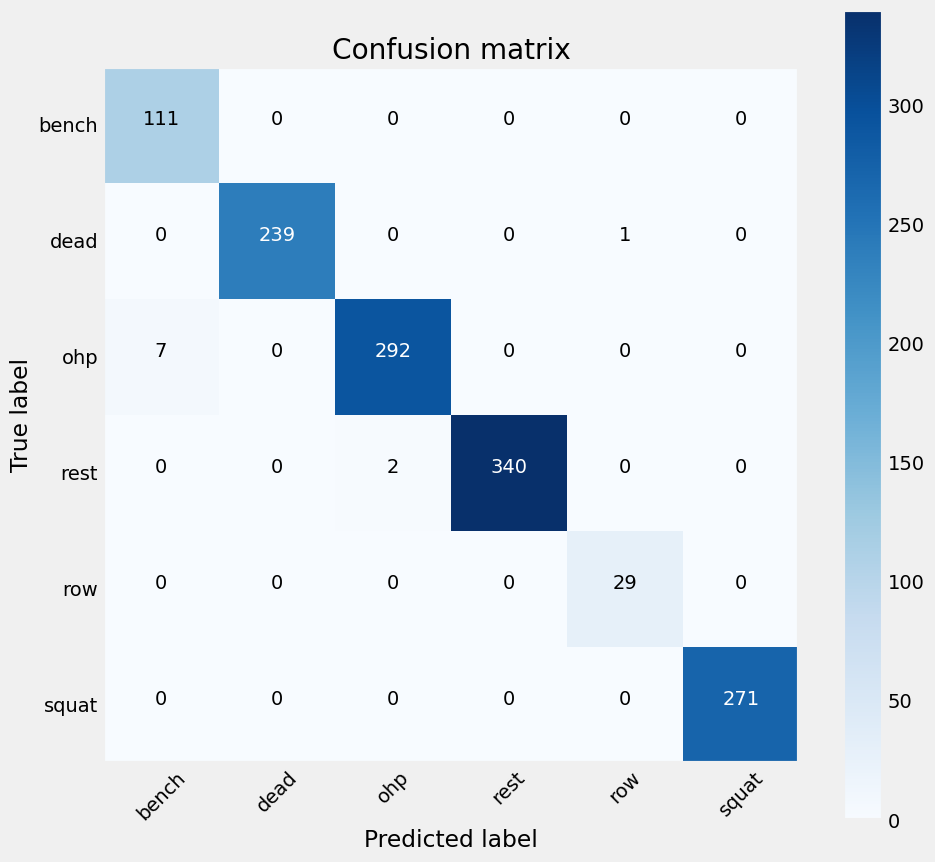

In [62]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)
# create confusion matrix for cm

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [63]:
accuracy

0.9922600619195047

In [66]:
selected_features

['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_r',
 'gyr_y_freq_1.786_Hz_ws_14',
 'acc_y',
 'pca_3']